**The Bellman equation**

The Bellman equation, named after Richard Bellman, helps us solve the Markov decision process (MDP). When we say solve the MDP, we mean finding the optimal policy.

**The Bellman equation of the value function**

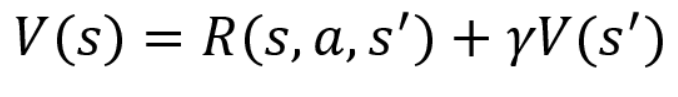

**Frozen Lake Problem**

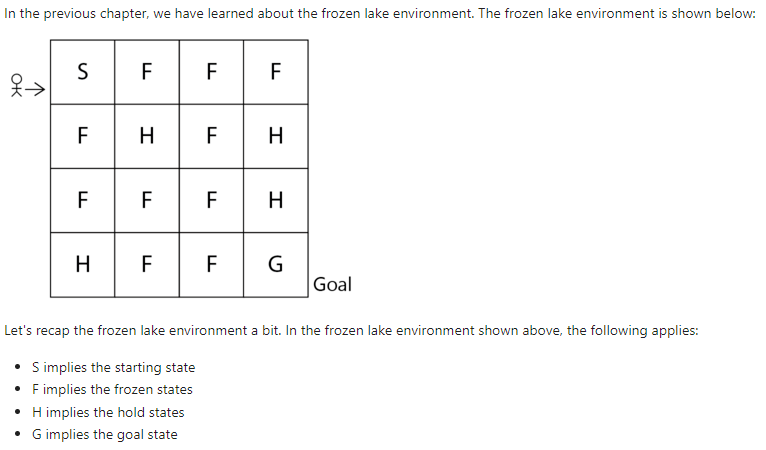

In [1]:
import gym
import numpy as np

In [2]:
env=gym.make('FrozenLake-v0')

In [3]:
env.render()


SFFF
FHFH
FFFH
HFFG


> **Computing Optimal Value Function**

We will use **Value Iteration** method, where we compute value function iteratively by taking maximum over Q function.

In [4]:
# maximizing over the Q function

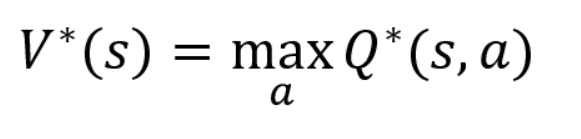

where

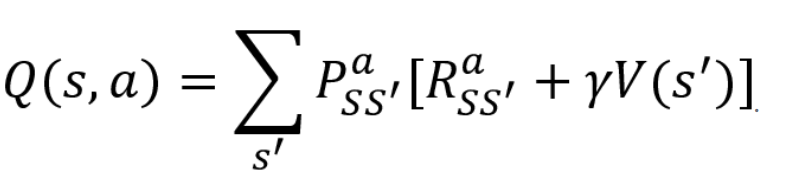

In [7]:
def value_iteration(env):

  num_iterations= 1000
  threshold = 1e-20  # for checking the convergence of the value function
  gamma = 1.0 # the discount factor
  value_table= np.zeros(env.observation_space.n)  # initializing value-table with zeros

  for i in range(num_iterations):

    updated_value_table= np.copy(value_table)
    # So now computing value-function by taking maximum of Q value
    for s in range(env.observation_space.n):

      Q_values = [
                  sum(
                      [prob * (r + gamma * updated_value_table[s_])
                       for prob, s_, r, _ in env.P[s][a]
                      ]
                      )
                        for a in range(env.action_space.n)
                  
                  ]
      value_table[s] = max(Q_values)

    
    if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
      break

  return value_table



In [8]:
optimal_value_function = value_iteration(env=env)


In [9]:
optimal_value_function

array([0.82352941, 0.82352941, 0.82352941, 0.82352941, 0.82352941,
       0.        , 0.52941176, 0.        , 0.82352941, 0.82352941,
       0.76470588, 0.        , 0.        , 0.88235294, 0.94117647,
       0.        ])

> **Now we have to extract optimal policy from the computed optimal value function**

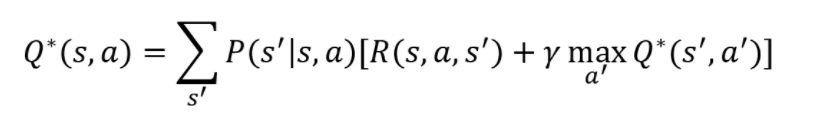

In [12]:
def extract_policy(value_table):

  gamma = 1.0
  policy = np.zeros(env.observation_space.n)

  # After computing the Q function, we can extract policy by selecting
  # action which has maximum Q value.

  for s in range(env.observation_space.n):
    Q_values = [sum([prob*(r + gamma * value_table[s_])
                          for prob, s_, r, _ in env.P[s][a]]) 
                                for a in range(env.action_space.n)] 
    policy[s] = np.argmax(np.array(Q_values))

  return policy
    




In [13]:
optimal_policy = extract_policy(optimal_value_function)


In [14]:
print(optimal_policy)

[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


In [15]:
env.action_space

Discrete(4)

In [16]:
env.render()


SFFF
FHFH
FFFH
HFFG
